### Scaling Data Made Simple  

When we teach computers to find patterns in data (like grouping things together), it’s important that all the information we give them is "fairly sized." If one piece of information is much bigger than another, the computer might think it’s more important—even if it’s not.  

---

### Why Scaling Is Important  
1. **Equal Importance for All Features:**  
   - Imagine you’re comparing heights and weights of people, but the heights are in meters (e.g., 1.7) and the weights are in kilograms (e.g., 70). Since the weight numbers are bigger, the computer might focus too much on weight and ignore height.  
   - Scaling makes sure all the numbers are on the same level so that no single feature dominates the result.

2. **Helps the Algorithm Work Better:**  
   - Computers solve problems step by step, refining their guesses until they get it right.  
   - If the data isn’t scaled, the computer might take longer to figure things out, like walking in circles instead of going straight to the answer.  
   - Scaling helps the computer solve the problem faster and more efficiently.

---

In short, scaling is like leveling the playing field so the computer treats all the information equally and works more smoothly!



---
## 1.&nbsp; Import libraries and files 💾

In [20]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [21]:
# Get the spreadsheet ID and name
sheet_id = "1CSkJ7w90AilX_zkl-2fDXBFq9MAL5hSDzkXRpE70pKE"
sheet_name = "2087670046"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `name` and only read the first 15 rows
songs_df = pd.read_csv(url,
                       index_col="artist",)


songs_df = songs_df.drop(columns="name")

---
## 2.&nbsp; Explore the data 👩‍🚀

In [22]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
artist,,,,,,,,,,,,,,,,,
Gilberto Gil,0,658.0,259.00,11,-13.141,0,705.0,694,5.87e-05,975.0,306.0,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Antônio Carlos Jobim,1,742.0,399.00,2,-12.646,1,346.0,217,1.88e-06,107.0,693.0,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
Martinho Da Vila,2,851.0,0.73,2,-11.048,1,347.0,453,6.34e-05,124.0,905.0,93.698,NaN,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Chico César,3,705.0,502.00,4,-18.115,1,471.0,879,4.05e-05,386.0,524.0,106.802,NaN,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Kurt Elling,4,651.0,119.00,6,-19.807,1,38.0,916,343,104.0,402.0,120.941,NaN,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,5230,202.0,694.00,3,-23.390,1,473.0,917,715,832.0,655.0,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
Tristan Murail,5231,188.0,101.00,6,-21.873,1,442.0,855,426,694.0,355.0,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
Arnold Schoenberg,5232,596.0,93.00,9,-42.959,1,434.0,951,969,772.0,344.0,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


In [23]:
print(songs_df.info())  # Check data types


<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Gilberto Gil to Maurice Ravel
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   danceability      5235 non-null   float64
 2   energy            5235 non-null   float64
 3   key               5235 non-null   int64  
 4   loudness          5235 non-null   float64
 5   mode              5235 non-null   int64  
 6   speechiness       5235 non-null   float64
 7   acousticness      5235 non-null   object 
 8   instrumentalness  5235 non-null   object 
 9   liveness          5235 non-null   float64
 10  valence           5235 non-null   float64
 11  tempo             5235 non-null   float64
 12  type              0 non-null      float64
 13  duration_ms       5235 non-null   int64  
 14  time_signature    5235 non-null   int64  
 15  id                5235 non-null   object 
 16  html              5235 non-

In [24]:
# Cleaning Data
#  Replace commas with dots in the entire DataFrame
songs_df = songs_df.replace(',', '.', regex=True)

# Convert all columns to numeric where possible
for column in songs_df.columns:
    try:
        songs_df[column] = pd.to_numeric(songs_df[column])
    except ValueError:
        pass  # Skip columns that cannot be converted



In [25]:
numeric_cols = songs_df.select_dtypes(include=['float64', 'int64']).columns
songs_numeric_df = songs_df[numeric_cols]
songs_numeric_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
artist,,,,,,,,,,,,,,,
Gilberto Gil,0,658.0,259.00,11,-13.141,0,705.0,694.0,0.000059,975.0,306.0,110.376,NaN,256213,4
Antônio Carlos Jobim,1,742.0,399.00,2,-12.646,1,346.0,217.0,0.000002,107.0,693.0,125.039,NaN,191867,4
Martinho Da Vila,2,851.0,0.73,2,-11.048,1,347.0,453.0,0.000063,124.0,905.0,93.698,NaN,152267,4
Chico César,3,705.0,502.00,4,-18.115,1,471.0,879.0,0.000041,386.0,524.0,106.802,NaN,186227,4
Kurt Elling,4,651.0,119.00,6,-19.807,1,38.0,916.0,343.000000,104.0,402.0,120.941,NaN,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,5230,202.0,694.00,3,-23.390,1,473.0,917.0,715.000000,832.0,655.0,87.906,NaN,995000,4
Tristan Murail,5231,188.0,101.00,6,-21.873,1,442.0,855.0,426.000000,694.0,355.0,83.134,NaN,855000,4
Arnold Schoenberg,5232,596.0,93.00,9,-42.959,1,434.0,951.0,969.000000,772.0,344.0,71.573,NaN,238187,3


---
## 3.&nbsp; Scalers - changing the range, but not the distribution 🎚️
When we scale with SKLearn we get the choice to use a variety of scalers. Scalers do not change the distribution of the data, they change the range of the data.

> **Remember:** Range = Max - Min

### 3.1.&nbsp; Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between.
<br>
<br>
\begin{align}
newValue = \frac{oldValue - min(column)}{max(column) - min(column)}
    \end{align}
<br>
Let's apply Min Max scaling to the whole DataFrame:

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create and configure the scaler
scaler = MinMaxScaler(feature_range=(0,11)).set_output(transform="pandas")

# Apply the scaler to the numeric DataFrame
minmax = scaler.fit_transform(songs_numeric_df)
# Fill NaN values with a default value (e.g., 0) to avoid issues
minmax_filled = minmax.fillna(0)
# Display the scaled DataFrame
print(minmax.head())


                      Unnamed: 0  danceability    energy   key  loudness  \
artist                                                                     
Gilberto Gil            0.000000      7.281690  2.851852  11.0  5.825278   
Antônio Carlos Jobim    0.002102      8.211268  4.393393   2.0  5.828476   
Martinho Da Vila        0.004203      9.417505  0.008038   2.0  5.838797   
Chico César             0.006305      7.801811  5.527528   4.0  5.793150   
Kurt Elling             0.008407      7.204225  1.310310   6.0  5.782221   

                      mode  speechiness  acousticness  instrumentalness  \
artist                                                                    
Gilberto Gil           0.0     7.762763      7.649299      6.463463e-07   
Antônio Carlos Jobim  11.0     3.809810      2.391784      2.070070e-08   
Martinho Da Vila      11.0     3.820821      4.992986      6.980981e-07   
Chico César           11.0     5.186186      9.688377      4.459459e-07   
Kurt Elling      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


If we plot the original and MinMax-scaled keys below, we can see that MinMax scaling only affects the range of the data on the x-axis, not the shape of the distribution.

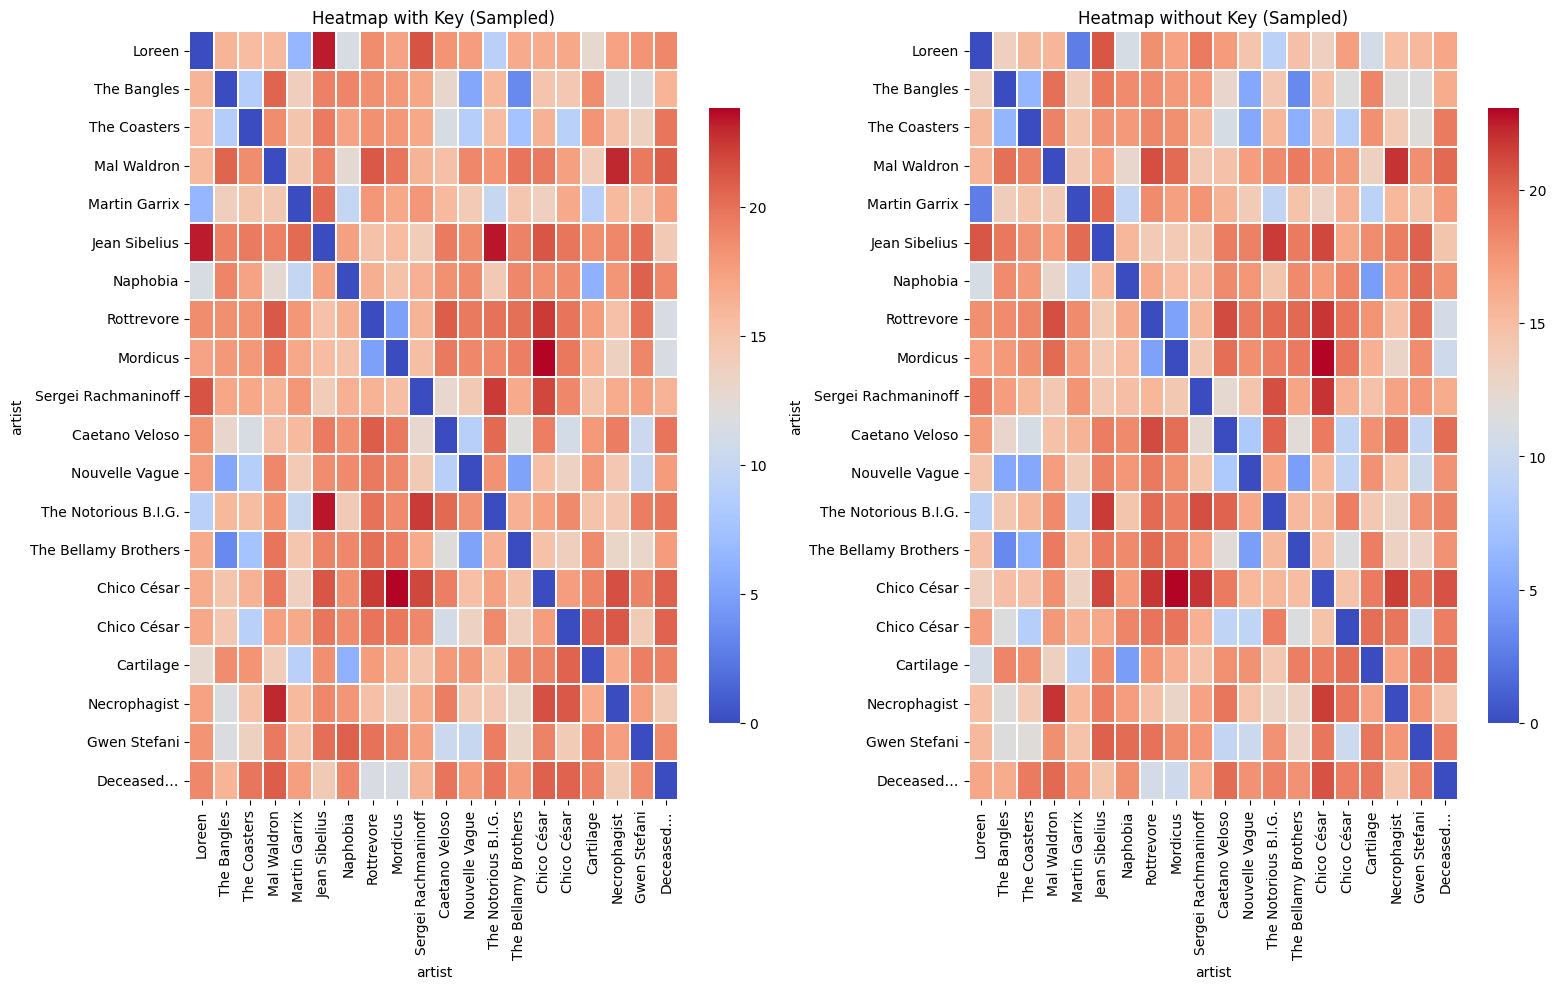

In [27]:
# Randomly sample rows for smaller heatmaps
sample_size = 20  # Adjust the number of rows to display
with_key_sampled = minmax_filled.sample(n=sample_size, random_state=42)

# Compute pairwise distances
with_key_distances_sampled = pd.DataFrame(pairwise_distances(with_key_sampled),
                                          index=with_key_sampled.index,
                                          columns=with_key_sampled.index)

# Exclude `key` and repeat for the second heatmap
without_key_sampled = with_key_sampled.drop(columns="key")
without_key_distances_sampled = pd.DataFrame(pairwise_distances(without_key_sampled),
                                             index=with_key_sampled.index,
                                             columns=with_key_sampled.index)

# Plot heatmaps for the sampled data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10)) # Adjust plot size for sampled data

sns.heatmap(with_key_distances_sampled, ax=ax1, cmap='coolwarm', linewidths=0.2, cbar_kws={"shrink": 0.8})
ax1.set_title('Heatmap with Key (Sampled)')

sns.heatmap(without_key_distances_sampled, ax=ax2, cmap='coolwarm', linewidths=0.2, cbar_kws={"shrink": 0.8})
ax2.set_title('Heatmap without Key (Sampled)')

plt.tight_layout()
plt.show()



Let's have a look at the affect MinMax scaling had on the heatmap

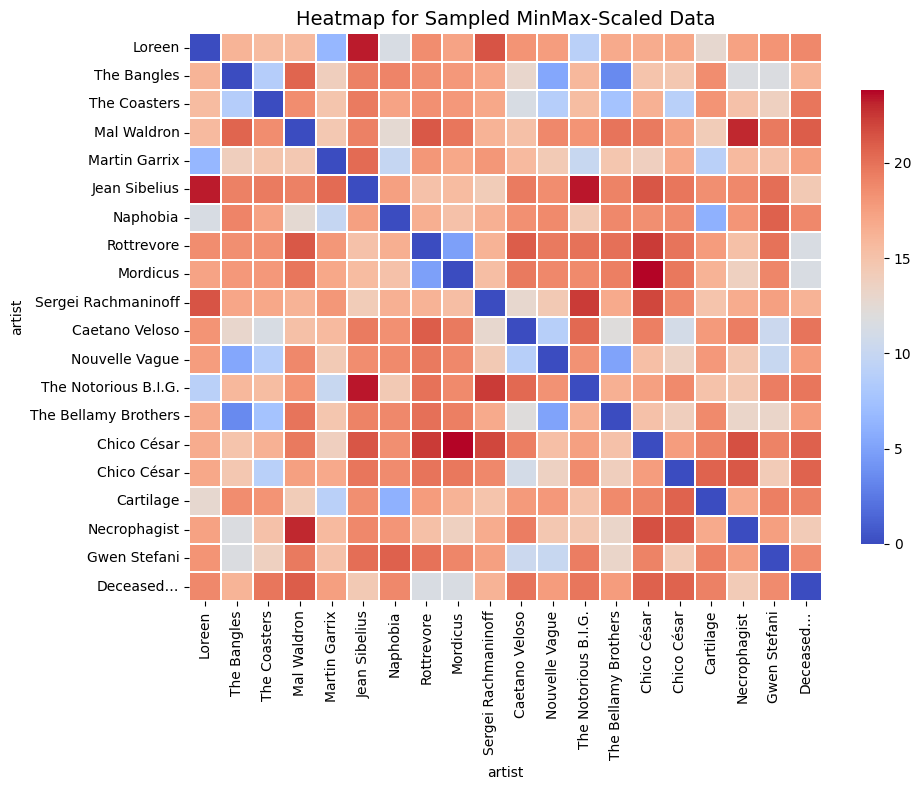

In [28]:
# Fill NaN values with 0
minmax_filled = minmax.fillna(0)

# Sample a subset of the data
sample_size = 20  # Adjust the number of rows/columns to display
sampled_data = minmax_filled.sample(n=sample_size, random_state=42)

# Compute pairwise distances for the sampled data
sampled_distances = pd.DataFrame(pairwise_distances(sampled_data),
                                 index=sampled_data.index,
                                 columns=sampled_data.index)

# Plot the heatmap for the sampled data
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(sampled_distances, ax=ax, cmap='coolwarm', linewidths=0.2, cbar_kws={"shrink": .8})
ax.set_title('Heatmap for Sampled MinMax-Scaled Data', fontsize=14)

plt.tight_layout()
plt.show()



By scaling all features between 0 and 1, we prevent any feature with a much larger scale from having a much larger impact on our final output.

### 3.2.&nbsp; Standard scaler

The StandardScaler scales all features according to the standard deviation of the feature. The standard deviation is equal to 1, and all other values are scaled accordingly. The data is also centered around 0, meaning that the mean becomes 0 and all values less than the mean are negative, while all values higher than the mean are positive.

\begin{align}
newValue = \frac{oldValue - mean(column)}{std(column)}
    \end{align}

Let's apply this to the whole DataFrame:

In [29]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns from songs_df
numeric_cols = songs_df.select_dtypes(include=['float64', 'int64']).columns
songs_numeric_df = songs_df[numeric_cols]

# Create and apply StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
with_key_standard = scaler.fit_transform(songs_numeric_df)

# Display the scaled DataFrame
print(with_key_standard.head())


                      Unnamed: 0  danceability    energy       key  loudness  \
artist                                                                         
Gilberto Gil           -1.731720      0.753774 -1.168512  1.608851 -0.117983   
Antônio Carlos Jobim   -1.731058      1.080577 -0.718051 -0.911297 -0.099676   
Martinho Da Vila       -1.730397      1.504642 -1.999517 -0.911297 -0.040576   
Chico César            -1.729735      0.936628 -0.386640 -0.351264 -0.301939   
Kurt Elling            -1.729073      0.726540 -1.618973  0.208769 -0.364515   

                          mode  speechiness  acousticness  instrumentalness  \
artist                                                                        
Gilberto Gil         -1.351545     1.289387      0.898283         -0.860546   
Antônio Carlos Jobim  0.739894    -0.189754     -0.499905         -0.860547   
Martinho Da Vila      0.739894    -0.185633      0.191861         -0.860546   
Chico César           0.739894     0.325268 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


To exemplify the effects of Standard scaling, let's compare the original values of the key column to the scaled values.

In [30]:
# Ensure that 'key' is the column being compared
pd.DataFrame({
    'original': songs_df['key'],  # Replace with the actual column name for 'key'
    'standard_scale': with_key_standard['key']  # Same column name in the scaled DataFrame
}).sort_values(by='original')


,original,standard_scale
artist,,
Sarcófago,0,-1.471330
De Randfichten,0,-1.471330
Pungent Stench,0,-1.471330
Cassidy,0,-1.471330
Arnie Love & The Lovelettes,0,-1.471330
...,...,...
Die Atzen,11,1.608851
Spice Girls,11,1.608851
Suffocation,11,1.608851


If we plot the original and Standard-scaled keys below, we can see that Standard scaling only affects the range of the data on the x-axis, not the shape of the distribution.

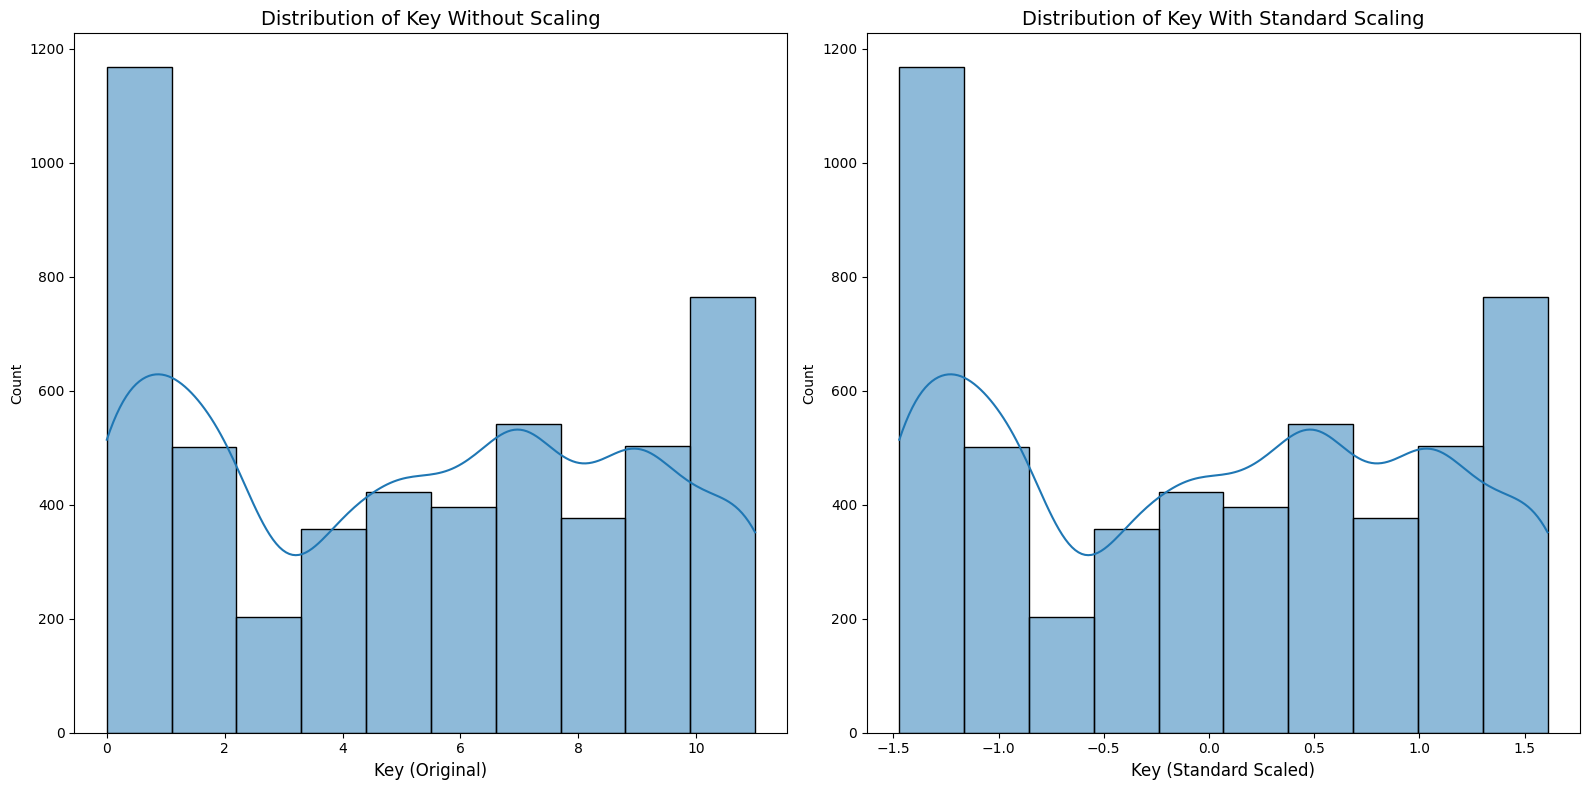

In [31]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Adjusted figsize for better layout

# Plotting the histograms
sns.histplot(data=songs_df['key'], bins=10, kde=True, ax=ax1)
sns.histplot(with_key_standard['key'], bins=10, kde=True, ax=ax2)  # Ues the scaled column

# Adding titles to the plots
ax1.set_title('Distribution of Key Without Scaling', fontsize=14)
ax2.set_title('Distribution of Key With Standard Scaling', fontsize=14)

# Adding x-axis labels for clarity
ax1.set_xlabel('Key (Original)', fontsize=12)
ax2.set_xlabel('Key (Standard Scaled)', fontsize=12)

plt.tight_layout()  # Ensure no overlapping of elements
plt.show()


Let's have a look at the affect Standard scaling had on the heatmap

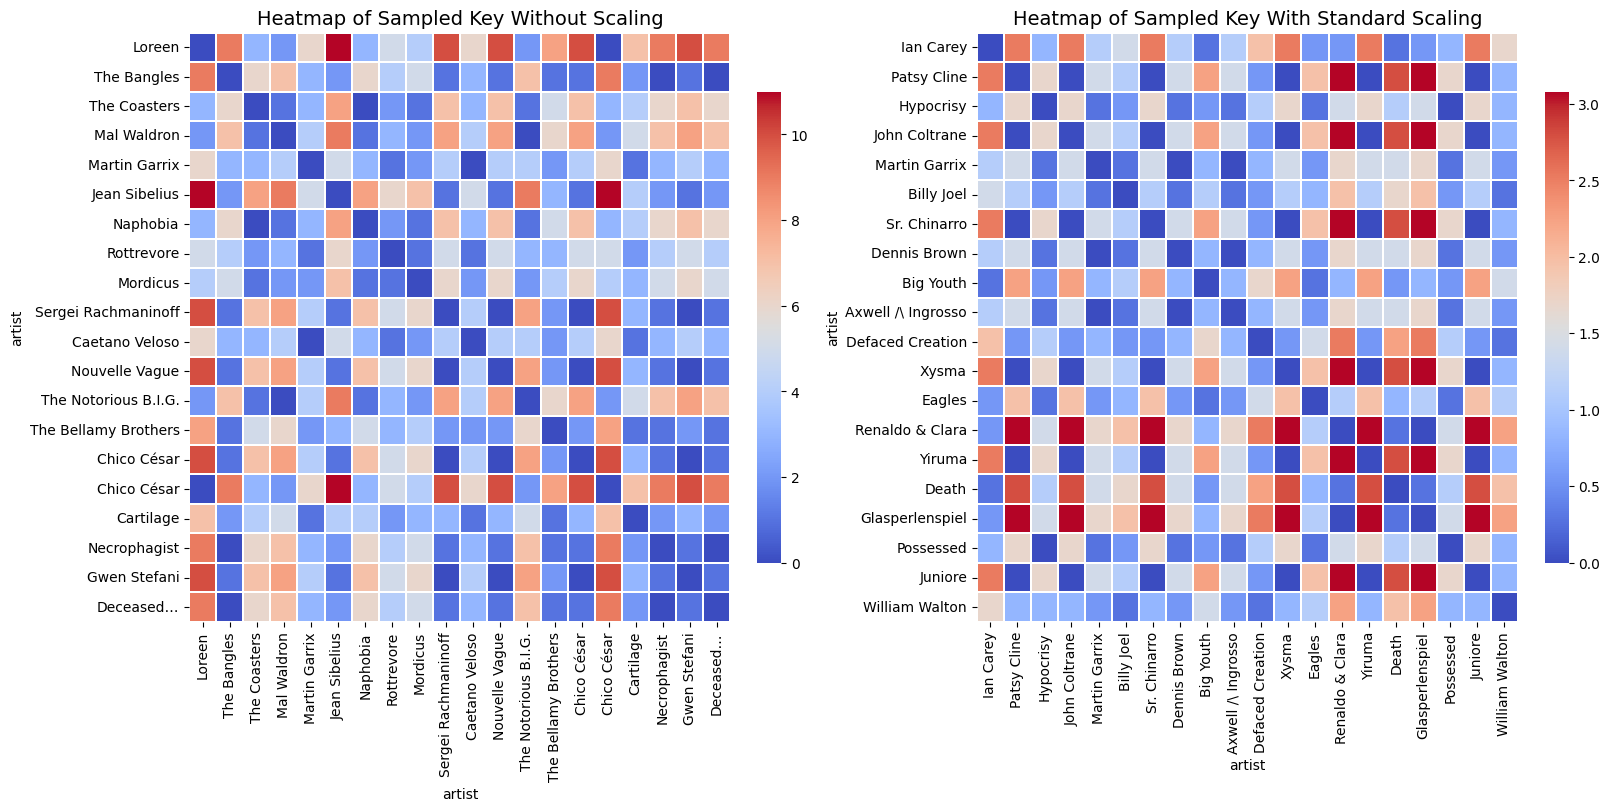

In [33]:
# Sample 20 rows for the heatmap
sample_size = 20
sampled_original_key = songs_df[['key']].sample(n=sample_size, random_state=42)
sampled_scaled_key = with_key_standard[['key']].sample(n=sample_size, random_state=24)

# Compute pairwise distances for the sampled data
sampled_original_distances = pd.DataFrame(pairwise_distances(sampled_original_key),
                                          index=sampled_original_key.index,
                                          columns=sampled_original_key.index)

sampled_scaled_distances = pd.DataFrame(pairwise_distances(sampled_scaled_key),
                                        index=sampled_scaled_key.index,
                                        columns=sampled_scaled_key.index)

# Plot the heatmaps for the sampled data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

sns.heatmap(sampled_original_distances, ax=ax1, cmap='coolwarm', linewidths=0.2, cbar_kws={"shrink": .8})
ax1.set_title('Heatmap of Sampled Key Without Scaling', fontsize=14)

sns.heatmap(sampled_scaled_distances, ax=ax2, cmap='coolwarm', linewidths=0.2, cbar_kws={"shrink": .8})
ax2.set_title('Heatmap of Sampled Key With Standard Scaling', fontsize=14)

plt.show()



### 3.3.&nbsp; Robust scaler

The RobustScaler scales all features between their interquartile ranges (IQRs). The IQR is the difference between the third quartile (Q3) and the first quartile (Q1) of the feature. The lowest value of the feature is scaled to Q1, the highest value of the feature is scaled to Q3, and all other values are scaled in between. The data is also centered around 0, meaning that the median becomes 0 and all values less than the median are negative, while all values higher than the median are positive.

\begin{align}
newValue = \frac{oldValue - median(column)}{IQR(column)}
      \end{align}

Let's apply this to the whole DataFrame:

In [35]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns
numeric_cols = songs_df.select_dtypes(include=['float64', 'int64']).columns
songs_numeric_df = songs_df[numeric_cols]

# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the numeric columns
with_key_robust = scaler.fit_transform(songs_numeric_df)

# Verify the scaled output
print(with_key_robust.head())



                      Unnamed: 0  danceability    energy       key  loudness  \
artist                                                                         
Gilberto Gil           -1.000000      0.367542 -0.958643  1.000000 -0.952584   
Antônio Carlos Jobim   -0.999618      0.568019 -0.661718 -0.500000 -0.871230   
Martinho Da Vila       -0.999236      0.828162 -1.506405 -0.500000 -0.608596   
Chico César            -0.998854      0.479714 -0.443266 -0.166667 -1.770071   
Kurt Elling            -0.998472      0.350835 -1.255567  0.166667 -2.048155   

                      mode  speechiness  acousticness  instrumentalness  \
artist                                                                    
Gilberto Gil          -1.0     0.994100      0.689362         -0.190962   
Antônio Carlos Jobim   0.0    -0.064897     -0.122553         -0.190962   
Martinho Da Vila       0.0    -0.061947      0.279149         -0.190962   
Chico César            0.0     0.303835      1.004255         -0

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


To exemplify the effects of Robust scaling, let's compare the original values of the key column to the scaled values.

In [36]:
# Display key column of original DataFrame and Robust-scaled DataFrame to compare
pd.DataFrame({
    'original': songs_df['key'],
    'robust_scale': with_key_robust['key']
}).sort_values(by='original')


,original,robust_scale
artist,,
Sarcófago,0,-0.833333
De Randfichten,0,-0.833333
Pungent Stench,0,-0.833333
Cassidy,0,-0.833333
Arnie Love & The Lovelettes,0,-0.833333
...,...,...
Die Atzen,11,1.000000
Spice Girls,11,1.000000
Suffocation,11,1.000000


If we plot the original and Robust-scaled keys below, we can see that Robust scaling only affects the range of the data on the x-axis, not the shape of the distribution.

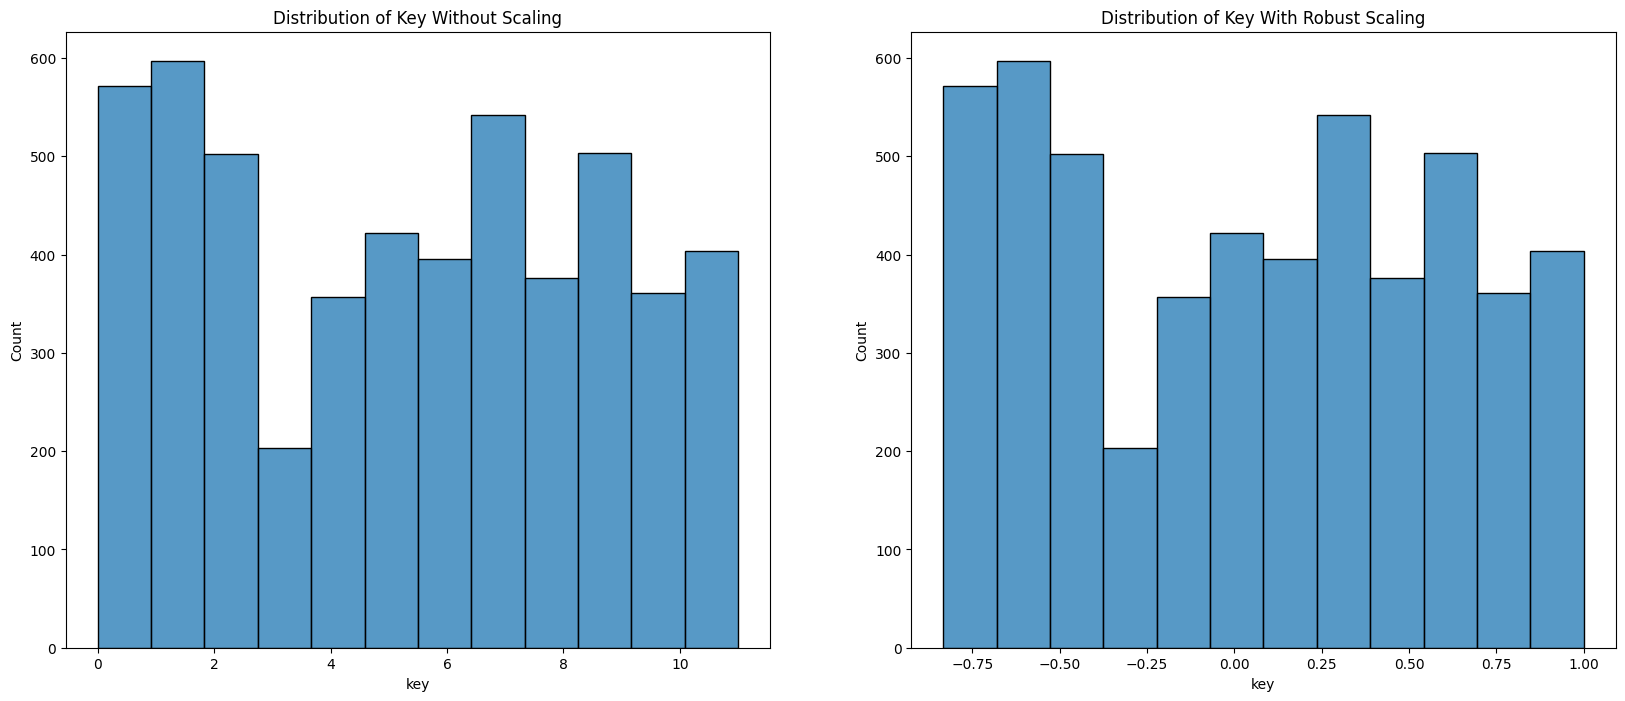

In [37]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two histograms for the key column
sns.histplot(data=songs_df['key'], bins=12, kde=False, ax=ax1)  # Original key distribution
sns.histplot(with_key_robust['key'], bins=12, kde=False, ax=ax2)  # Robust-scaled key distribution

# Adding titles to the plots
ax1.set_title('Distribution of Key Without Scaling')
ax2.set_title('Distribution of Key With Robust Scaling')

plt.show()


Let's have a look at the affect Robust scaling had on the heatmap

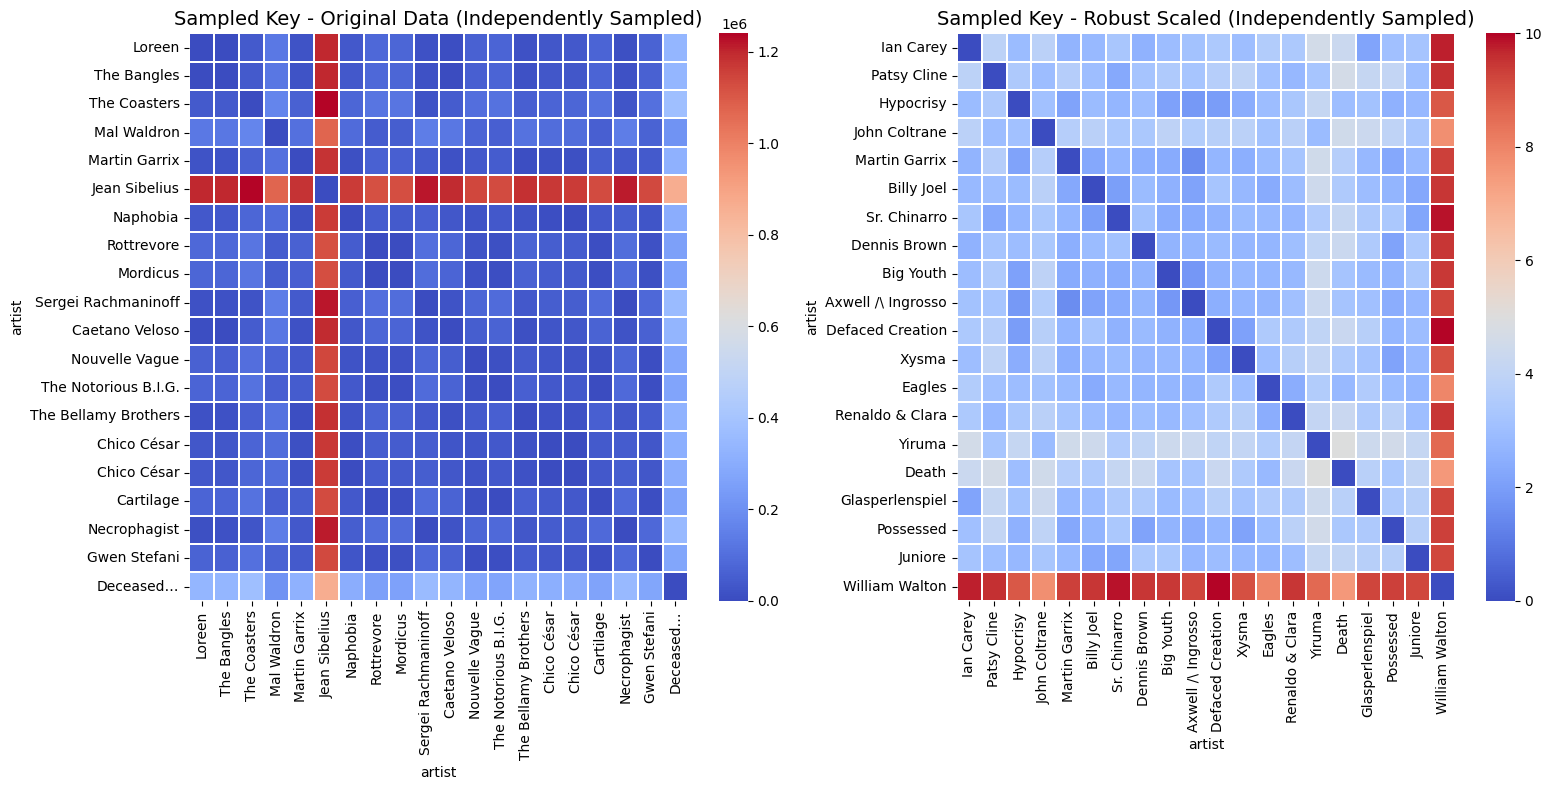

In [44]:
# Define sample size
sample_size = 20

# Independently sample rows from the original numeric DataFrame
songs_numeric_df_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)

# Independently sample rows from the Robust-scaled DataFrame
with_key_robust_sampled = with_key_robust.sample(n=sample_size, random_state=24).fillna(0)

# Compute pairwise distances for the independently sampled data
with_key_distances_sampled = pd.DataFrame(pairwise_distances(songs_numeric_df_sampled),
                                          index=songs_numeric_df_sampled.index,
                                          columns=songs_numeric_df_sampled.index)

with_key_robust_distances_sampled = pd.DataFrame(pairwise_distances(with_key_robust_sampled),
                                                 index=with_key_robust_sampled.index,
                                                 columns=with_key_robust_sampled.index)

# Plot the heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(with_key_distances_sampled, ax=ax1, cmap='coolwarm', linewidths=0.2)
ax1.set_title('Sampled Key - Original Data (Independently Sampled)', fontsize=14)

sns.heatmap(with_key_robust_distances_sampled, ax=ax2, cmap='coolwarm', linewidths=0.2)
ax2.set_title('Sampled Key - Robust Scaled (Independently Sampled)', fontsize=14)

plt.tight_layout()
plt.show()



The robust scaler can often be a good idea, it's designed to help against outliers affecting the data by using the interquartile range instead of the full range (like the minmax scaler). Unfortunately, here it hasn't helped much because the interquartile range of the age column is so much larger than the interquartile range of any other column, and therefore the age column still distorts our concept of similarity (distance).

---
## 4.&nbsp; Transformers - changing the range and the distribution 🎛️
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. The assumption that the distribution is normal is explicitly used in the calculations for models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

### 4.1.&nbsp; Quantile transformer

All of the columns get scaled according to their [quantile](https://en.wikipedia.org/wiki/Quantile).

> **Note:** Quantiles are divisions of data that tell us how much of the data is present below a certain point. For example, the median is the middle value in a dataset, so it is a quantile of 0.5, meaning that half of the data exists at or below the median. Similarly, 78% of the data exists at or below the quantile 0.78.

Let's apply this to the whole DataFrame:

In [51]:
# Number of samples
number_of_samples = songs_df.shape[0]  # Get the number of samples from songs_df

# Select only numeric columns
numeric_cols = songs_df.select_dtypes(include=['float64', 'int64']).columns
songs_numeric_df = songs_df[numeric_cols]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles=number_of_samples, random_state=42).set_output(transform="pandas")

# Transform the numeric DataFrame
with_key_quantile = scaler.fit_transform(songs_numeric_df)

# Display the transformed DataFrame
print(with_key_quantile.head())


                      Unnamed: 0  danceability    energy       key  loudness  \
artist                                                                         
Gilberto Gil            0.000000      0.726882  0.178258  1.000000  0.188288   
Antônio Carlos Jobim    0.000191      0.844478  0.244555  0.271207  0.204910   
Martinho Da Vila        0.000382      0.961693  0.041460  0.271207  0.262132   
Chico César             0.000573      0.795090  0.302923  0.392147  0.097631   
Kurt Elling             0.000764      0.714081  0.105655  0.544612  0.076614   

                      mode  speechiness  acousticness  instrumentalness  \
artist                                                                    
Gilberto Gil           0.0     0.875048      0.751433          0.385460   
Antônio Carlos Jobim   1.0     0.448605      0.420997          0.268055   
Martinho Da Vila       1.0     0.450994      0.622660          0.388804   
Chico César            1.0     0.678353      0.855082          0

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


To exemplify the effects of Quantile transformation, let's compare the original values of the key column to the transformed values.

In [52]:
# Display key column of original DataFrame and Quantile-transformed DataFrame to compare
pd.DataFrame({
    'original': songs_numeric_df['key'],  # Original key column
    'quantile_transformed': with_key_quantile['key']  # Quantile-transformed key column
}).sort_values(by='original')


,original,quantile_transformed
artist,,
Sarcófago,0,0.0
De Randfichten,0,0.0
Pungent Stench,0,0.0
Cassidy,0,0.0
Arnie Love & The Lovelettes,0,0.0
...,...,...
Die Atzen,11,1.0
Spice Girls,11,1.0
Suffocation,11,1.0


If we plot the original and Quantile transformed keys below, we can see that Quantile transforming not only affects the range of the data on the x-axis, but the shape of the distribution too.

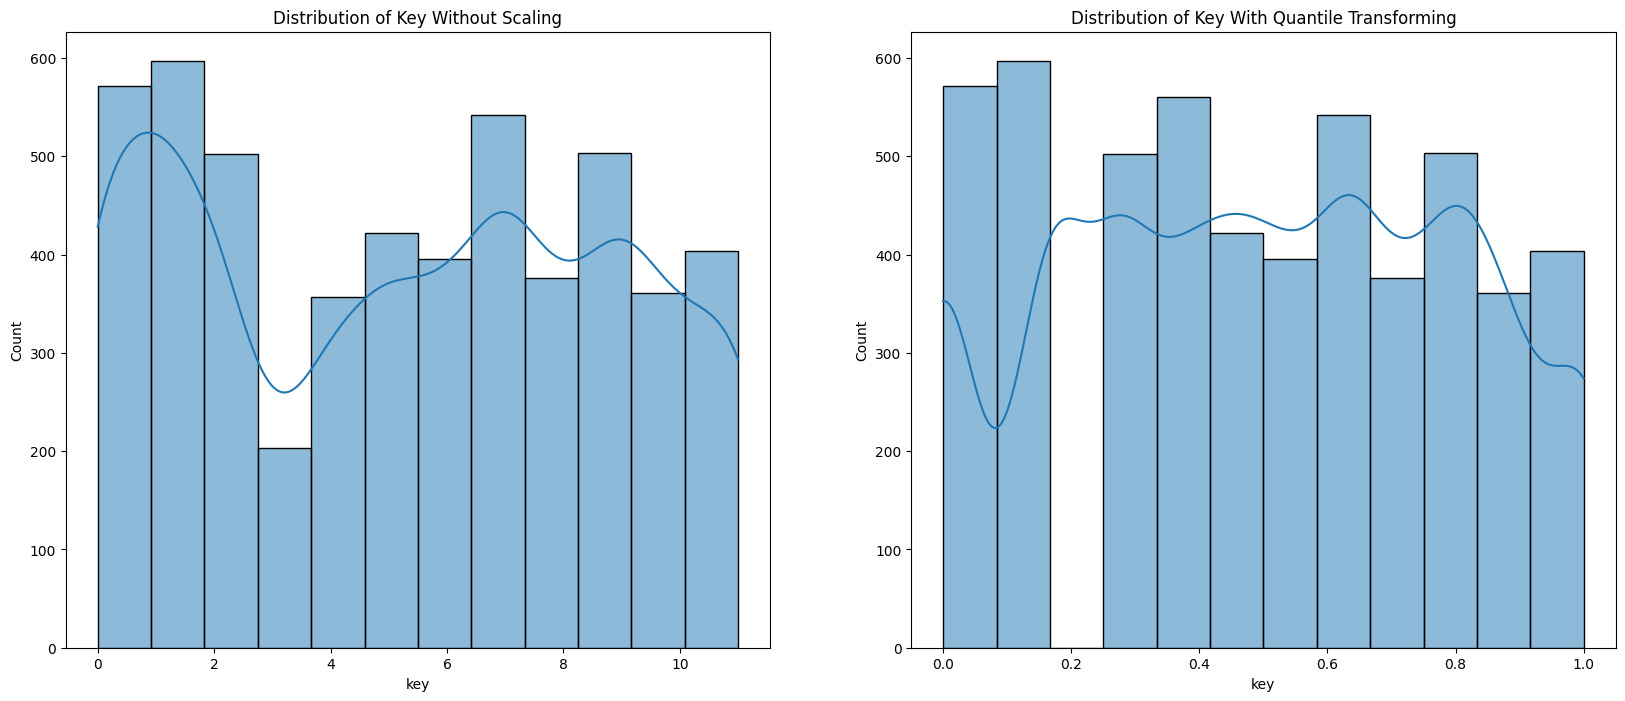

In [53]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two histograms for the key column
sns.histplot(data=songs_numeric_df['key'], bins=12, kde=True, ax=ax1)  # Original key distribution
sns.histplot(with_key_quantile['key'], bins=12, kde=True, ax=ax2)  # Quantile-transformed key distribution

# Adding titles to the plots
ax1.set_title('Distribution of Key Without Scaling')
ax2.set_title('Distribution of Key With Quantile Transforming')

plt.show()


Let's have a look at the affect Quantile transformation had on the heatmap

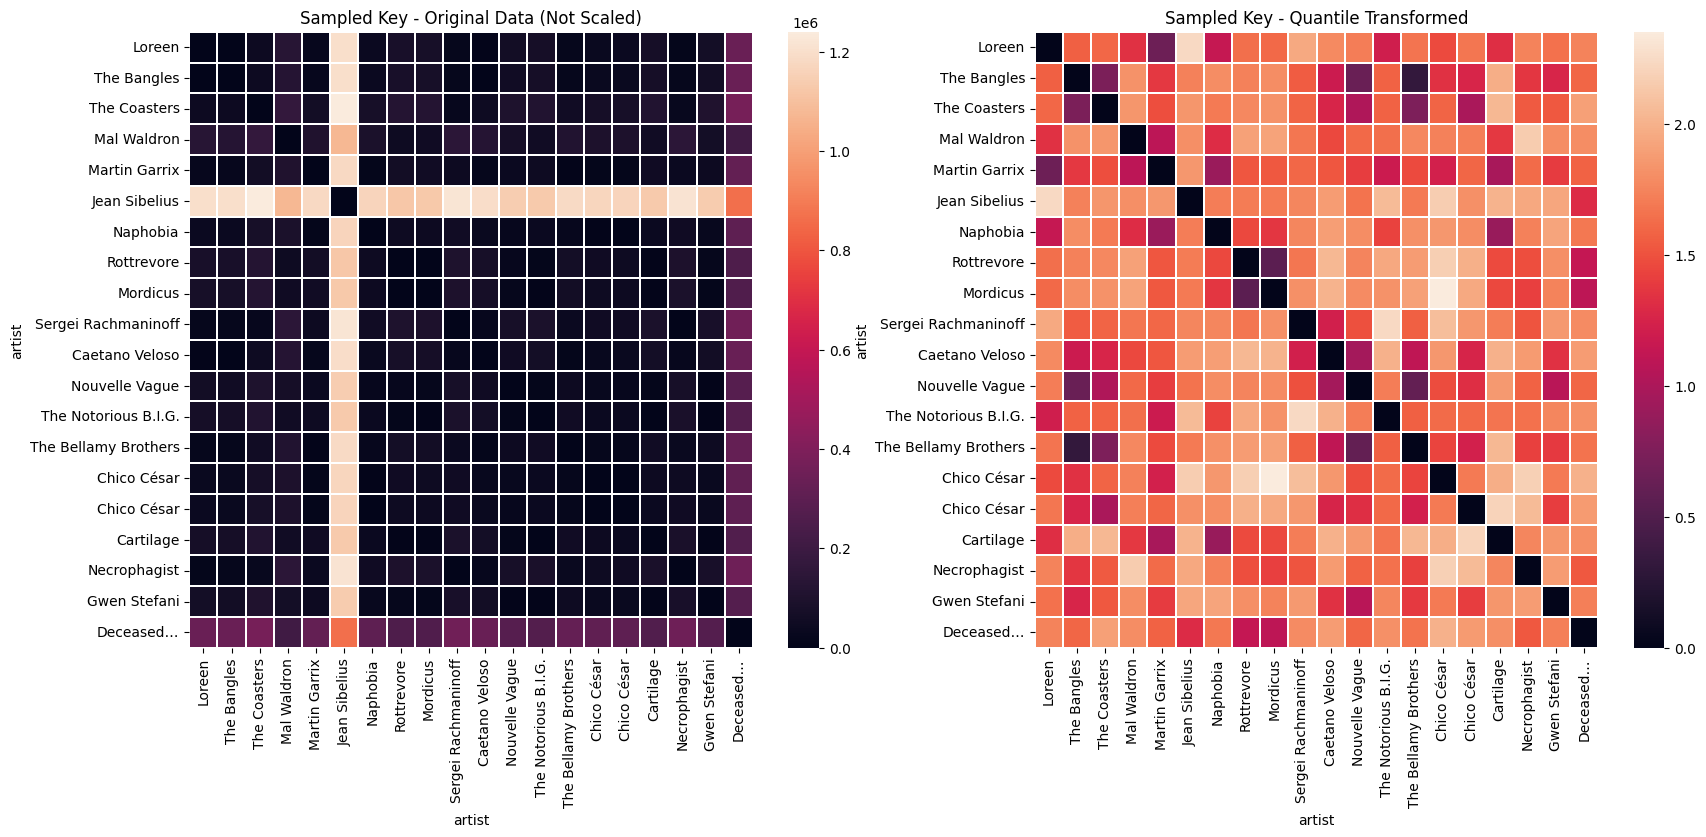

In [57]:
# Define sample size
sample_size = 20

# Sample rows from the Quantile-transformed DataFrame and fill NaNs
with_key_quantile_sampled = with_key_quantile.sample(n=sample_size, random_state=42).fillna(0)

# Sample rows from the original numeric DataFrame and fill NaNs
with_key_distances_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)

# Compute pairwise distances for the sampled data
with_key_quantile_distances = pd.DataFrame(pairwise_distances(with_key_quantile_sampled),
                                           index=with_key_quantile_sampled.index,
                                           columns=with_key_quantile_sampled.index)

with_key_distances = pd.DataFrame(pairwise_distances(with_key_distances_sampled),
                                  index=with_key_distances_sampled.index,
                                  columns=with_key_distances_sampled.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two sampled heatmaps
sns.heatmap(with_key_distances, ax=ax1, linewidths=.2)
sns.heatmap(with_key_quantile_distances, ax=ax2, linewidths=.2)

# Adding titles to the plots
ax1.set_title('Sampled Key - Original Data (Not Scaled)')
ax2.set_title('Sampled Key - Quantile Transformed')

plt.show()


### 4.2.&nbsp; Power transformer

Power transformers transform the data via [power functions](https://en.wikipedia.org/wiki/Power_transform). They can use either the Yeo-Johnson transformation, or the Box-Cox transformation. You don't need to understand the maths behind this one, just know that it reshapes the data to more closely resemble the normal distribution.

Let's apply this to the whole DataFrame:

In [58]:
# Define sample size
sample_size = 20

# Sample rows from the original numeric DataFrame
songs_numeric_df_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)

# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")

# Transform the sampled DataFrame
with_key_power = scaler.fit_transform(songs_numeric_df_sampled.fillna(0))

To exemplify the effects of Power transformation, let's compare the original values of the key column to the transformed values.

In [59]:
# Display 1st column of original DataFrame and 1st column of Power-transformed DataFrame to compare
pd.DataFrame({
    'original': songs_numeric_df_sampled.iloc[:, 0],
    'power_transformed': with_key_power.iloc[:, 0]
}).sort_values(by='original')


,original,power_transformed
artist,,
Chico César,79,-1.682620
Chico César,80,-1.680387
Caetano Veloso,157,-1.533500
The Coasters,422,-1.183287
Nouvelle Vague,426,-1.178894
The Bellamy Brothers,1094,-0.594627
The Bangles,1268,-0.471069
Gwen Stefani,1533,-0.296019
Sergei Rachmaninoff,1859,-0.097550


If we plot the original and Power transformed keys below, we can see that Power transforming not only affects the range of the data on the x-axis, but the shape of the distribution too.

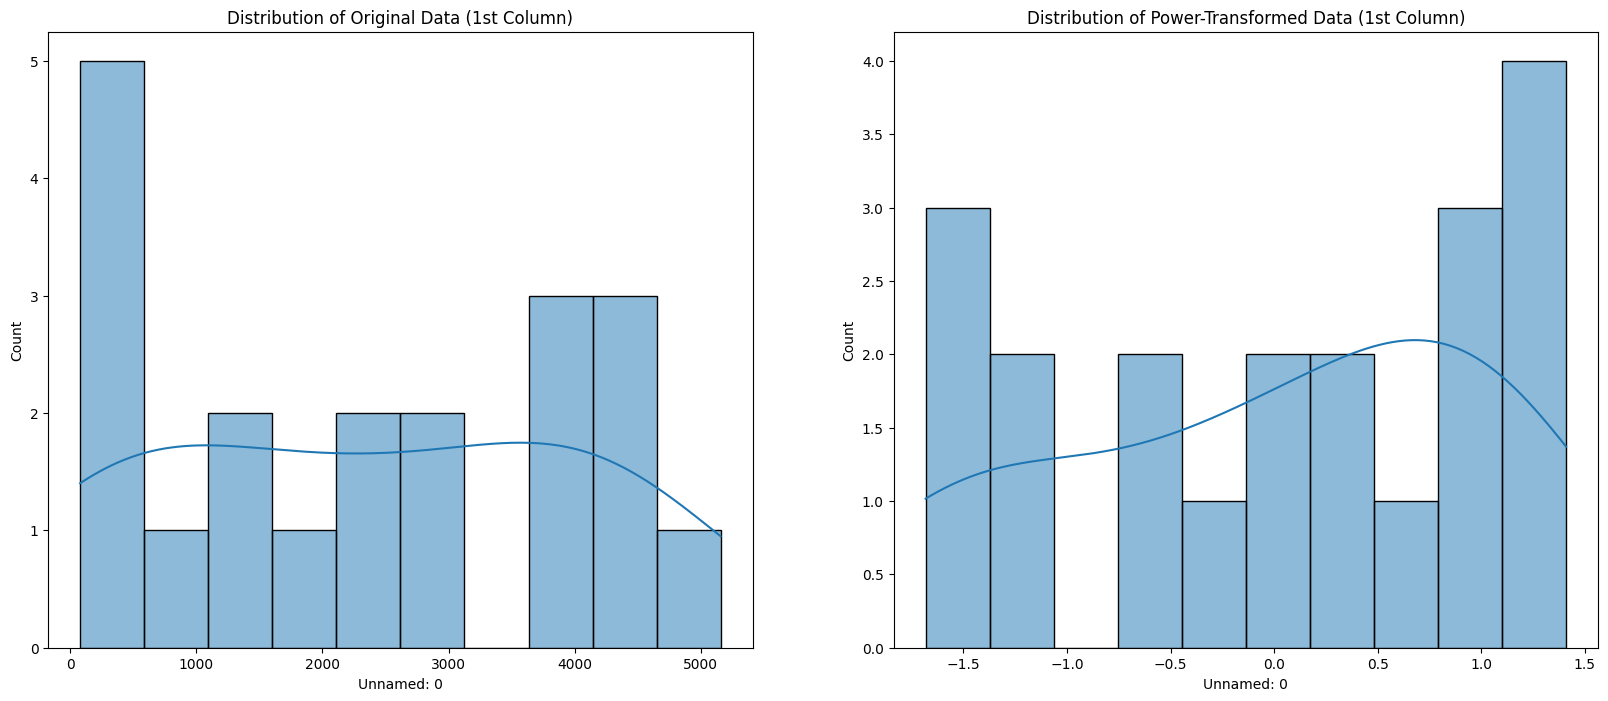

In [60]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two histograms for the first column
sns.histplot(data=songs_numeric_df_sampled.iloc[:, 0], bins=10, kde=True, ax=ax1)
sns.histplot(data=with_key_power.iloc[:, 0], bins=10, kde=True, ax=ax2)

# Adding titles to the plots
ax1.set_title('Distribution of Original Data (1st Column)')
ax2.set_title('Distribution of Power-Transformed Data (1st Column)')

plt.show()


Let's have a look at the affect Power transformation had on the heatmap

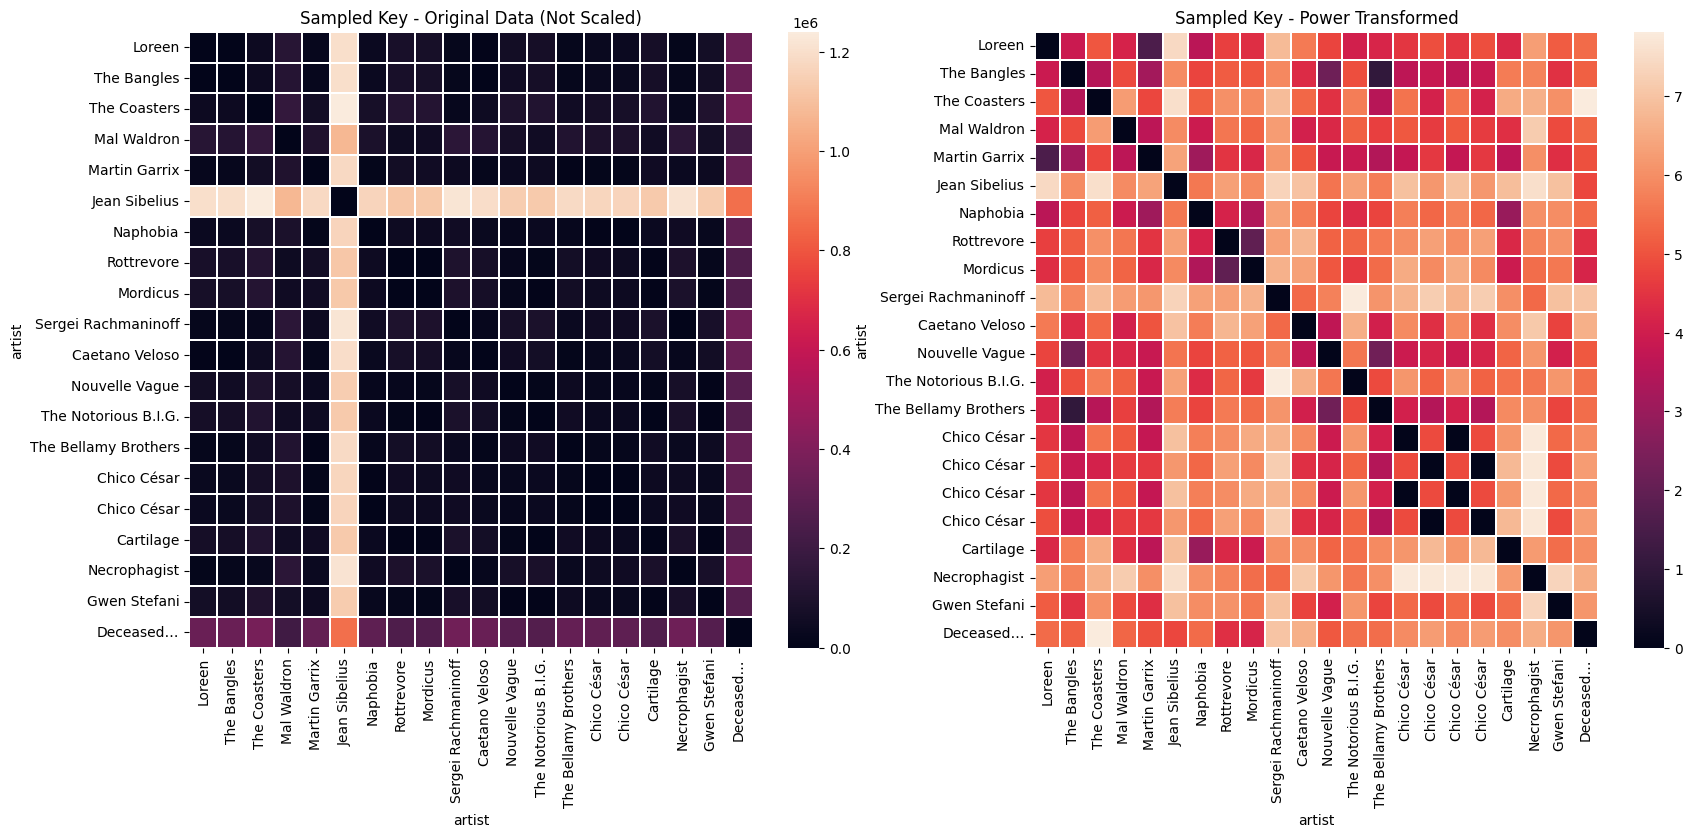

In [61]:
# Define sample size
sample_size = 20

# Sample rows from the original numeric DataFrame
songs_numeric_df_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)

# Sample rows from the Power-transformed DataFrame
with_key_power_sampled = with_key_power.loc[songs_numeric_df_sampled.index].fillna(0)

# Compute pairwise distances for the sampled data
with_key_distances_sampled = pd.DataFrame(pairwise_distances(songs_numeric_df_sampled),
                                          index=songs_numeric_df_sampled.index,
                                          columns=songs_numeric_df_sampled.index)

with_key_power_distances_sampled = pd.DataFrame(pairwise_distances(with_key_power_sampled),
                                                index=with_key_power_sampled.index,
                                                columns=with_key_power_sampled.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two sampled heatmaps
sns.heatmap(with_key_distances_sampled, ax=ax1, linewidths=.2)
sns.heatmap(with_key_power_distances_sampled, ax=ax2, linewidths=.2)

# Adding titles to the plots
ax1.set_title('Sampled Key - Original Data (Not Scaled)')
ax2.set_title('Sampled Key - Power Transformed')

plt.show()


---
## 5.&nbsp; Comparing all 6 options 🔍

### 5.1.&nbsp; All 6 histograms for comparison

In [63]:
# Define the sample size
sample_size = 20

# Sample rows from the original numeric DataFrame
songs_numeric_df_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)

# Apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
with_key_minmax = minmax_scaler.fit_transform(songs_numeric_df_sampled)

# Apply RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler().set_output(transform="pandas")
with_key_robust = robust_scaler.fit_transform(songs_numeric_df_sampled)

# Apply StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().set_output(transform="pandas")
with_key_standard = standard_scaler.fit_transform(songs_numeric_df_sampled)

# Apply QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
quantile_scaler = QuantileTransformer(n_quantiles=sample_size, random_state=42).set_output(transform="pandas")
with_key_quantile = quantile_scaler.fit_transform(songs_numeric_df_sampled)

# Apply PowerTransformer
from sklearn.preprocessing import PowerTransformer
power_scaler = PowerTransformer().set_output(transform="pandas")
with_key_power = power_scaler.fit_transform(songs_numeric_df_sampled)



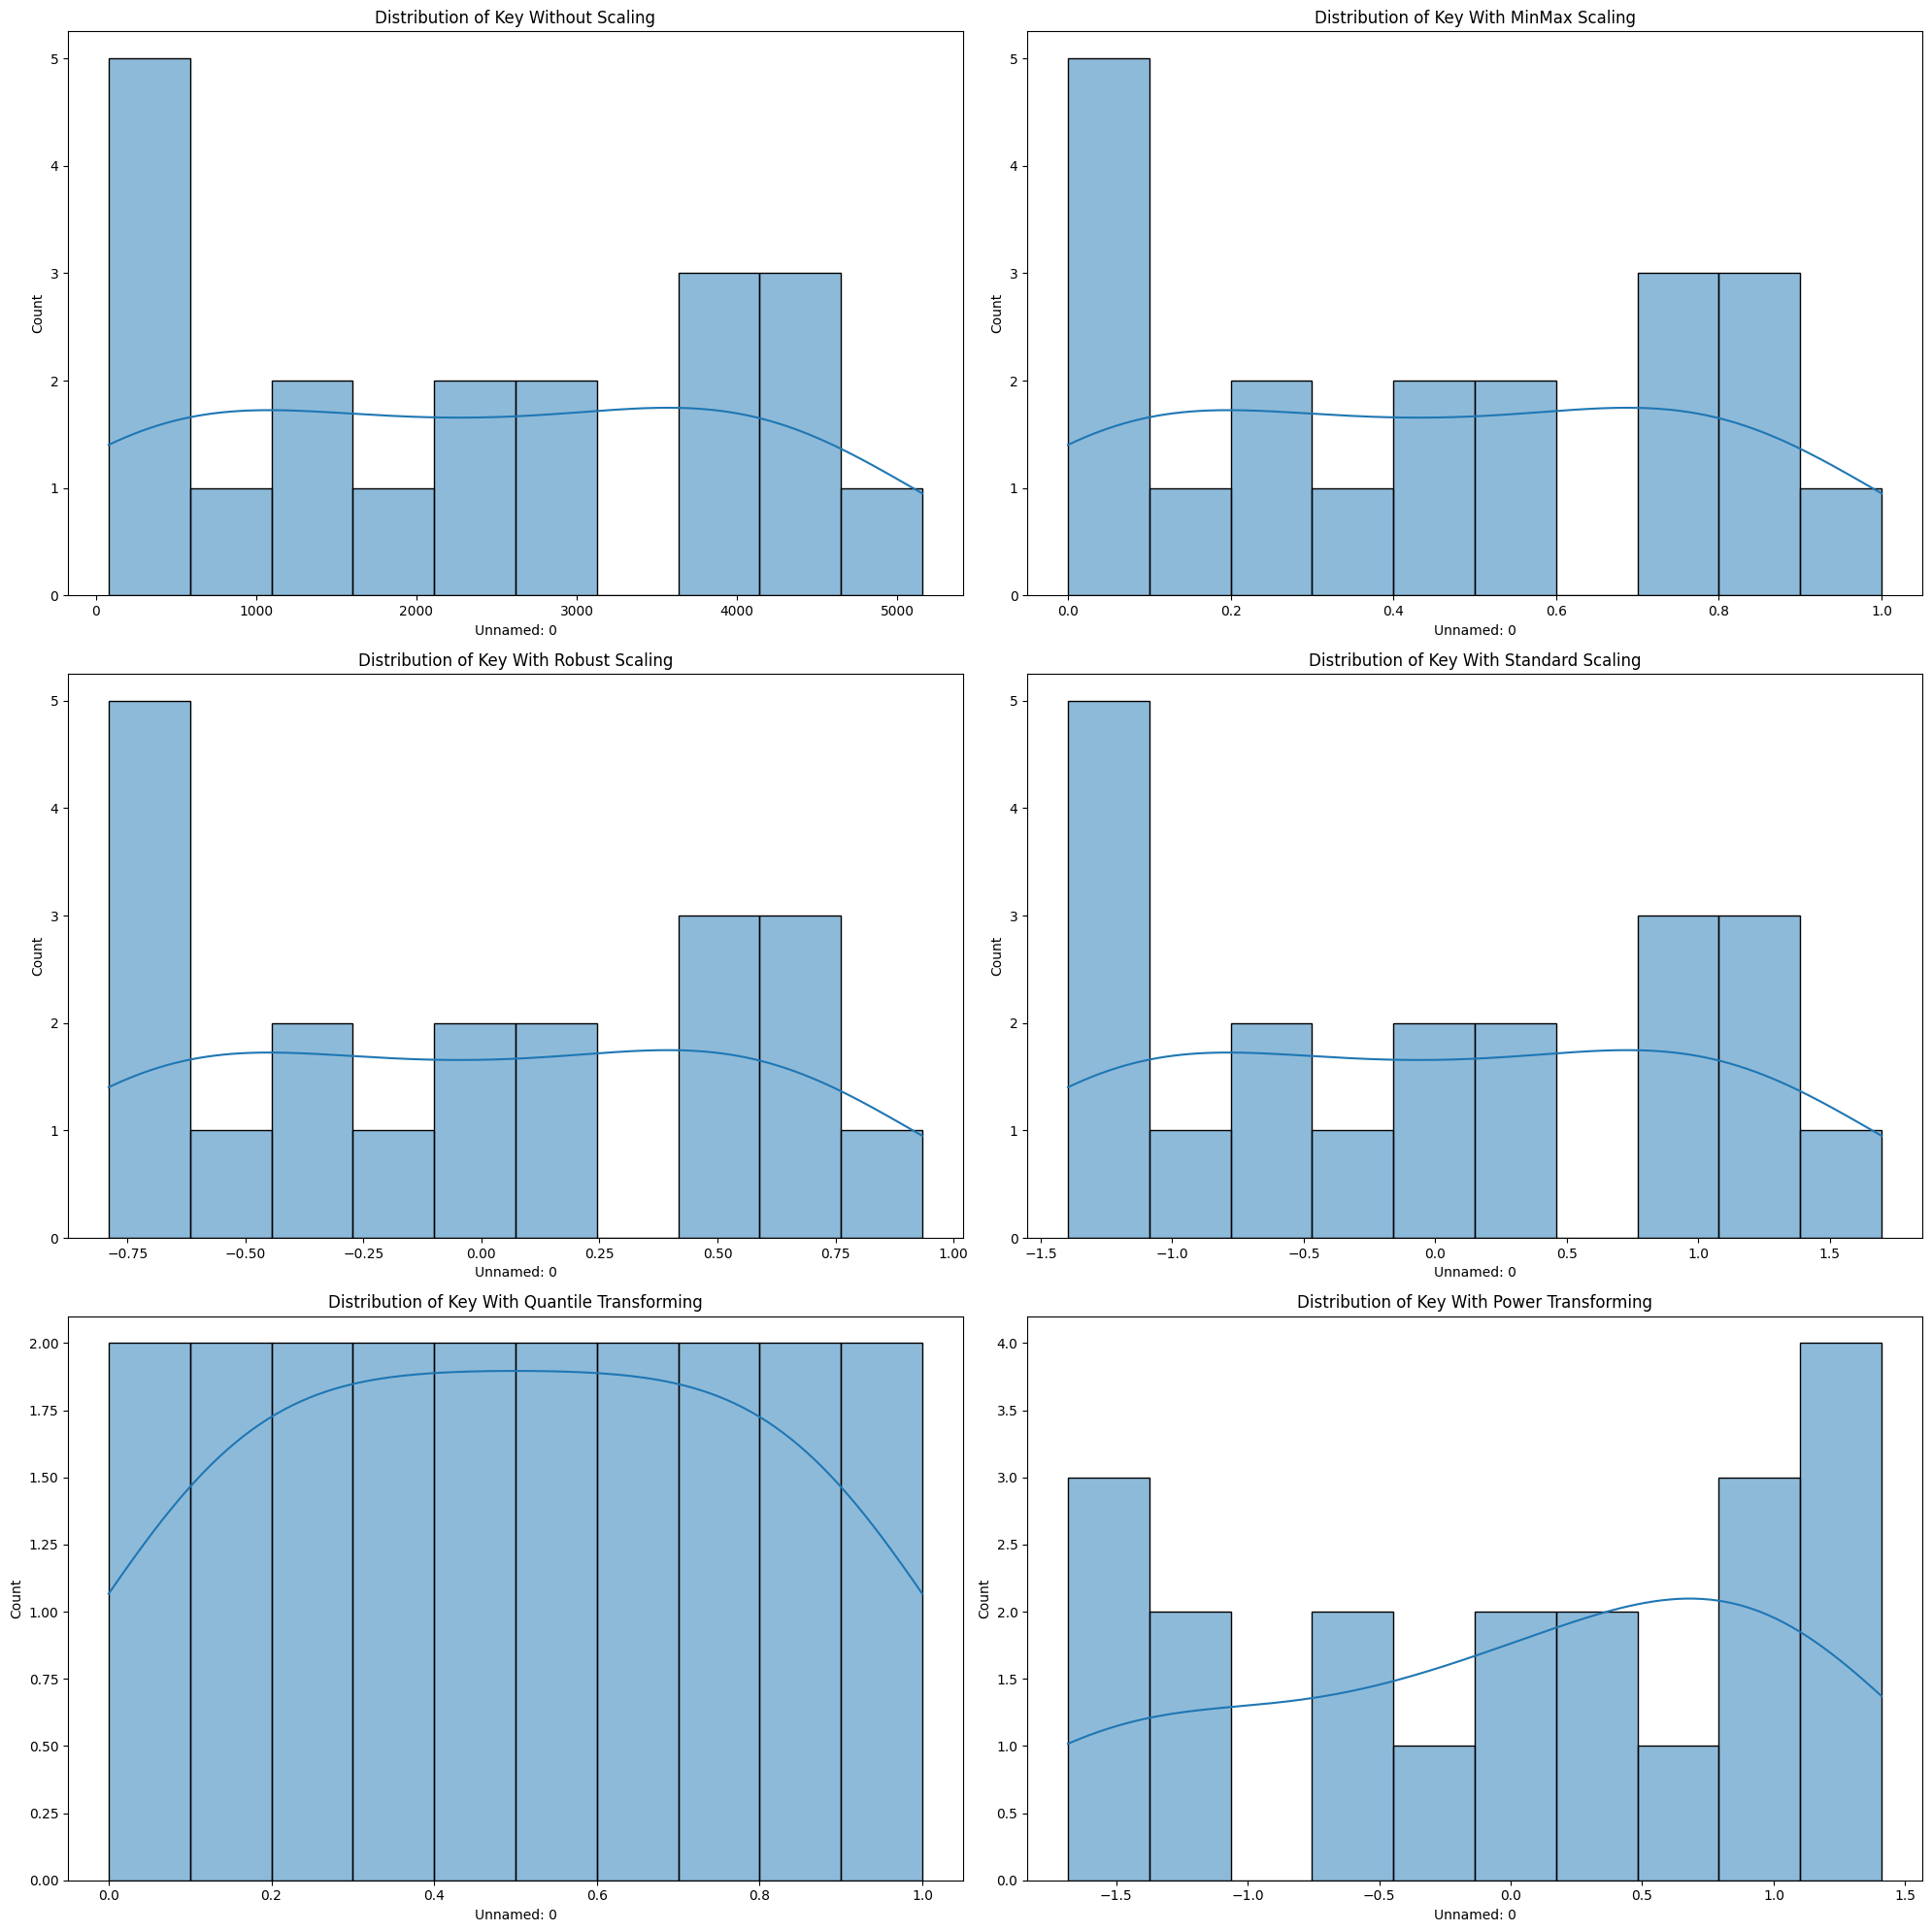

In [64]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plotting histograms for the first column of each DataFrame
sns.histplot(data=songs_numeric_df_sampled.iloc[:, 0], bins=10, kde=True, ax=ax[0, 0])
sns.histplot(data=with_key_minmax.iloc[:, 0], bins=10, kde=True, ax=ax[0, 1])
sns.histplot(data=with_key_robust.iloc[:, 0], bins=10, kde=True, ax=ax[1, 0])
sns.histplot(data=with_key_standard.iloc[:, 0], bins=10, kde=True, ax=ax[1, 1])
sns.histplot(data=with_key_quantile.iloc[:, 0], bins=10, kde=True, ax=ax[2, 0])
sns.histplot(data=with_key_power.iloc[:, 0], bins=10, kde=True, ax=ax[2, 1])

# Adding titles to the plots
ax[0, 0].set_title('Distribution of Key Without Scaling')
ax[0, 1].set_title('Distribution of Key With MinMax Scaling')
ax[1, 0].set_title('Distribution of Key With Robust Scaling')
ax[1, 1].set_title('Distribution of Key With Standard Scaling')
ax[2, 0].set_title('Distribution of Key With Quantile Transforming')
ax[2, 1].set_title('Distribution of Key With Power Transforming')

plt.tight_layout()
plt.show()


### 5.2.&nbsp; All 6 heatmaps for comparison

In [66]:
# Define sample size
sample_size = 20

# Sample the original and scaled DataFrames
songs_numeric_df_sampled = songs_numeric_df.sample(n=sample_size, random_state=42).fillna(0)
with_key_minmax_sampled = with_key_minmax.loc[songs_numeric_df_sampled.index]
with_key_robust_sampled = with_key_robust.loc[songs_numeric_df_sampled.index]
with_key_standard_sampled = with_key_standard.loc[songs_numeric_df_sampled.index]
with_key_quantile_sampled = with_key_quantile.loc[songs_numeric_df_sampled.index]
with_key_power_sampled = with_key_power.loc[songs_numeric_df_sampled.index]

# Compute pairwise distances for each sampled DataFrame
with_key_distances_sampled = pd.DataFrame(pairwise_distances(songs_numeric_df_sampled),
                                          index=songs_numeric_df_sampled.index,
                                          columns=songs_numeric_df_sampled.index)

with_key_minmax_distances_sampled = pd.DataFrame(pairwise_distances(with_key_minmax_sampled),
                                                 index=with_key_minmax_sampled.index,
                                                 columns=with_key_minmax_sampled.index)

with_key_robust_distances_sampled = pd.DataFrame(pairwise_distances(with_key_robust_sampled),
                                                 index=with_key_robust_sampled.index,
                                                 columns=with_key_robust_sampled.index)

with_key_standard_distances_sampled = pd.DataFrame(pairwise_distances(with_key_standard_sampled),
                                                   index=with_key_standard_sampled.index,
                                                   columns=with_key_standard_sampled.index)

with_key_quantile_distances_sampled = pd.DataFrame(pairwise_distances(with_key_quantile_sampled),
                                                   index=with_key_quantile_sampled.index,
                                                   columns=with_key_quantile_sampled.index)

with_key_power_distances_sampled = pd.DataFrame(pairwise_distances(with_key_power_sampled),
                                                index=with_key_power_sampled.index,
                                                columns=with_key_power_sampled.index)


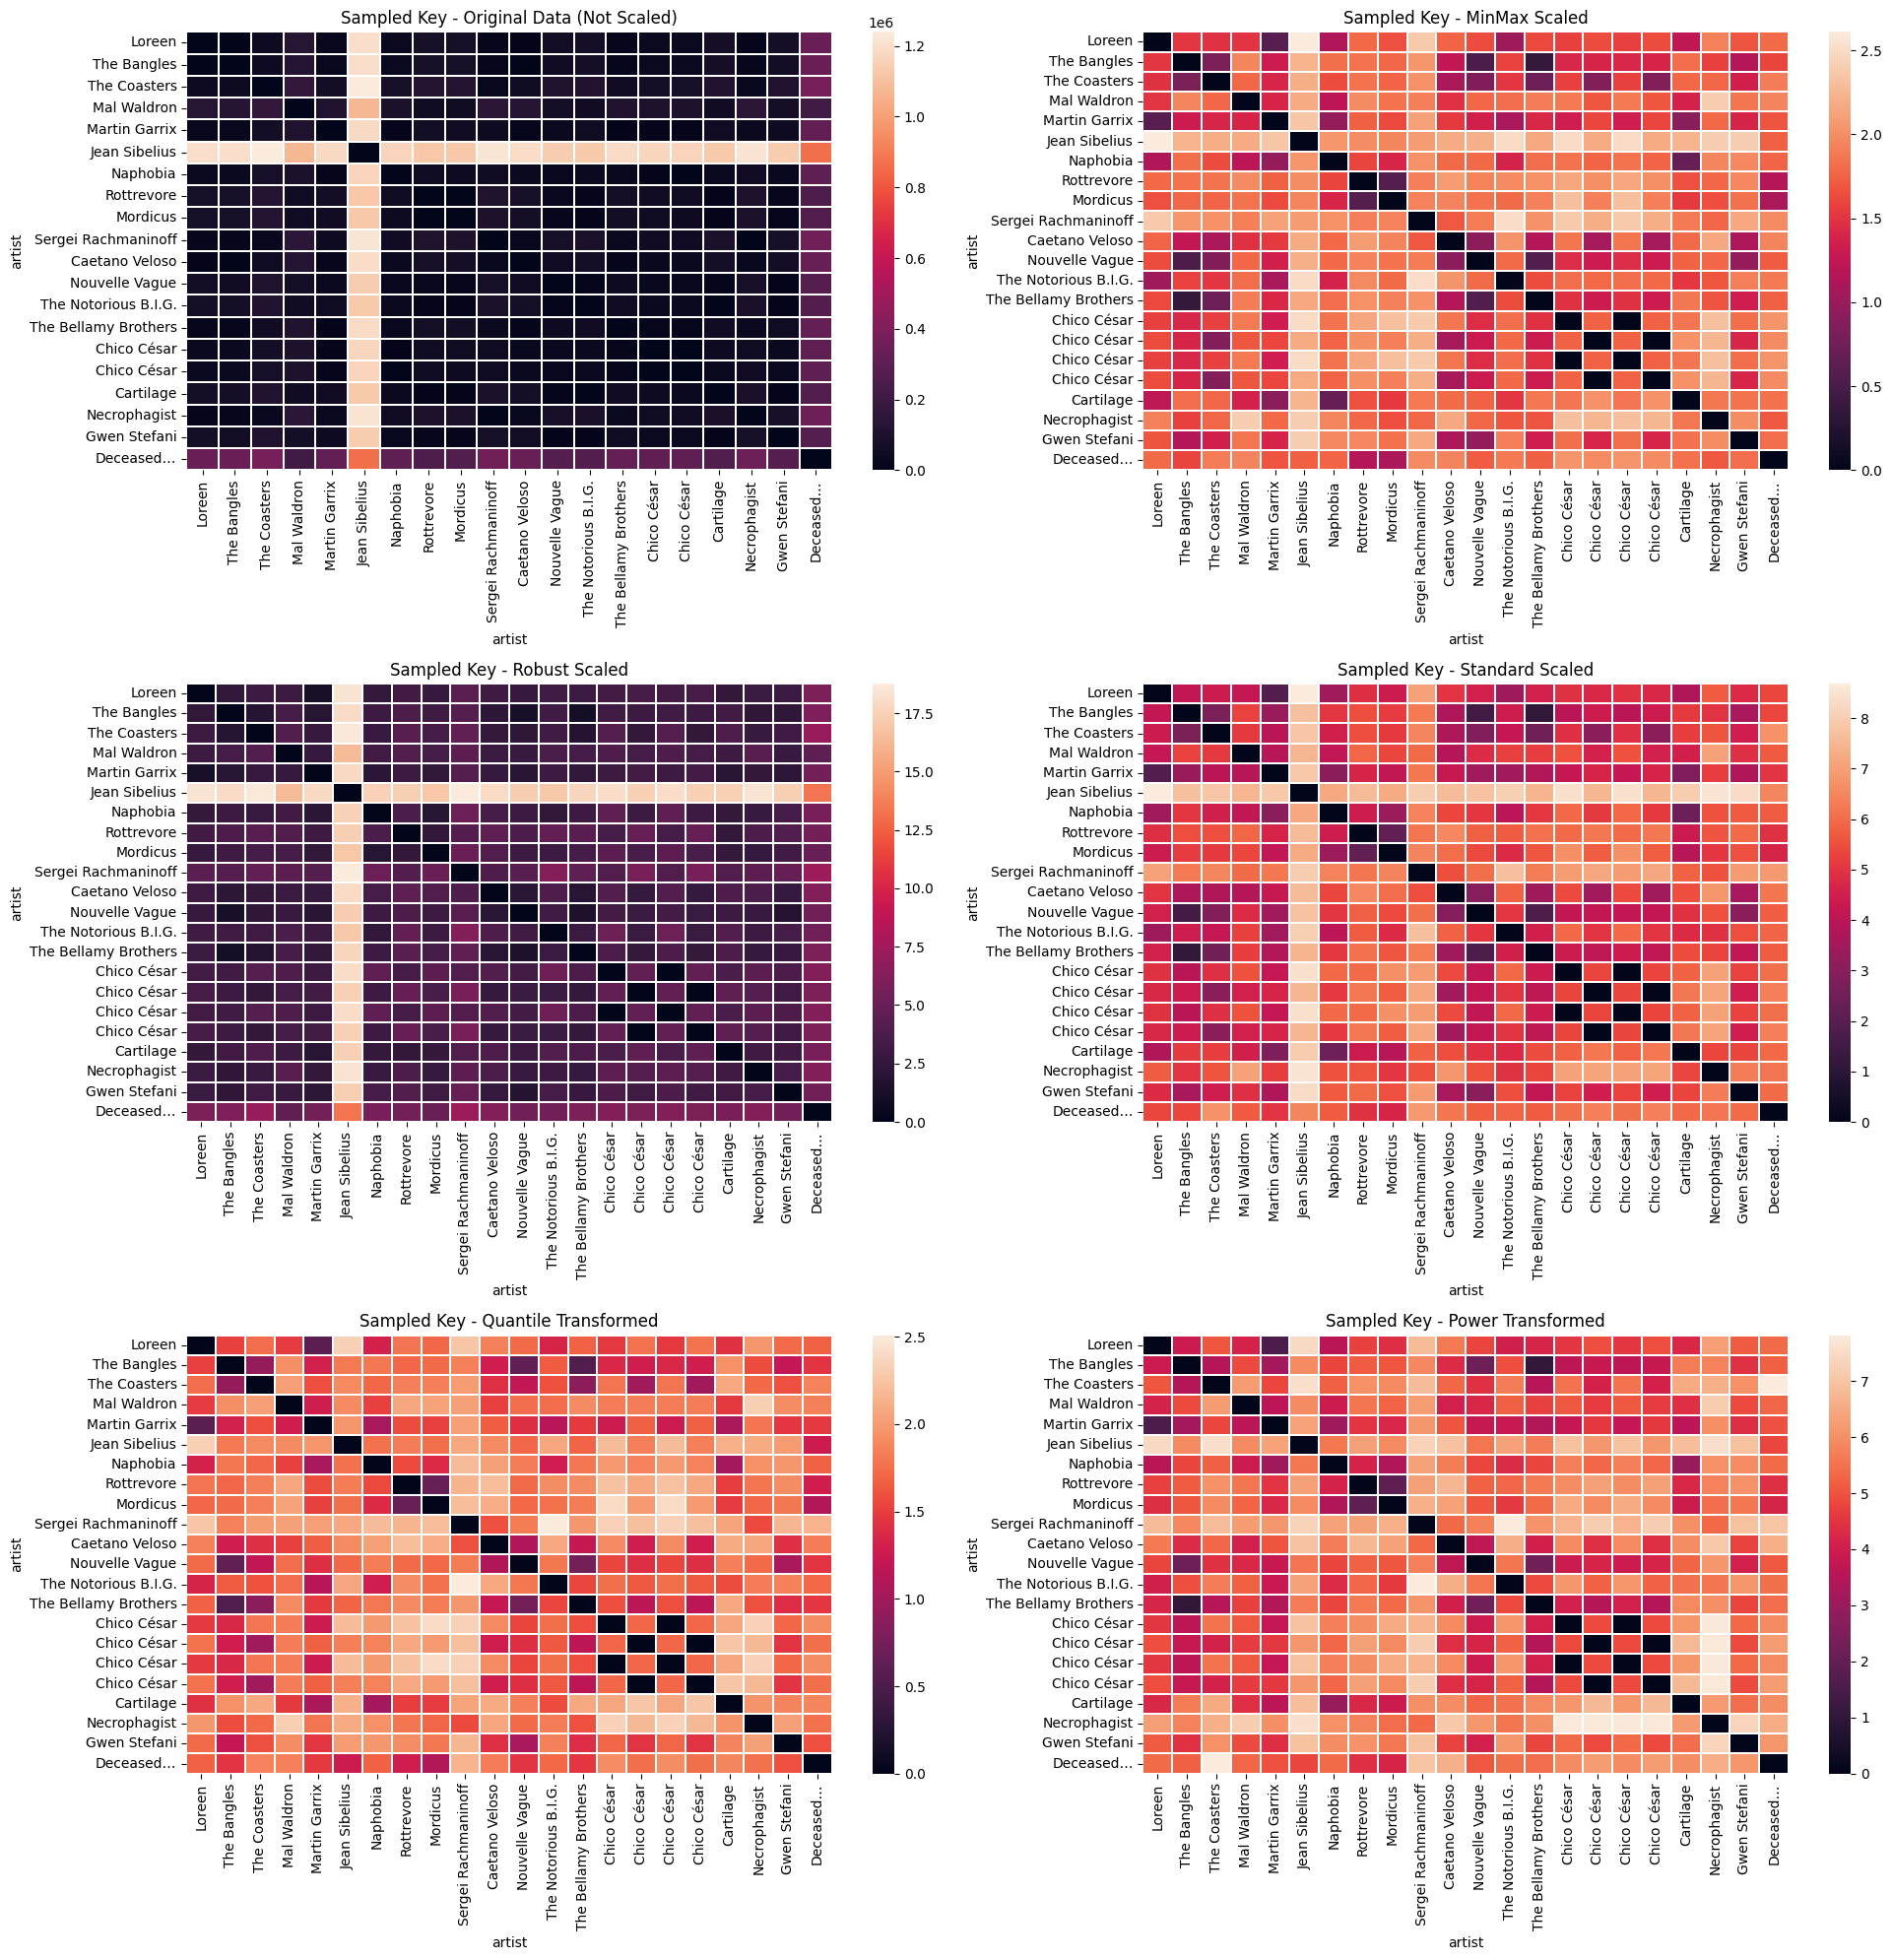

In [67]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plotting heatmaps for sampled data
sns.heatmap(with_key_distances_sampled, ax=ax[0, 0], linewidths=.2)
sns.heatmap(with_key_minmax_distances_sampled, ax=ax[0, 1], linewidths=.2)
sns.heatmap(with_key_robust_distances_sampled, ax=ax[1, 0], linewidths=.2)
sns.heatmap(with_key_standard_distances_sampled, ax=ax[1, 1], linewidths=.2)
sns.heatmap(with_key_quantile_distances_sampled, ax=ax[2, 0], linewidths=.2)
sns.heatmap(with_key_power_distances_sampled, ax=ax[2, 1], linewidths=.2)

# Adding titles to the plots
ax[0, 0].set_title('Sampled Key - Original Data (Not Scaled)')
ax[0, 1].set_title('Sampled Key - MinMax Scaled')
ax[1, 0].set_title('Sampled Key - Robust Scaled')
ax[1, 1].set_title('Sampled Key - Standard Scaled')
ax[2, 0].set_title('Sampled Key - Quantile Transformed')
ax[2, 1].set_title('Sampled Key - Power Transformed')

plt.tight_layout()
plt.show()


If you wish to explore further, [SKLearn: Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

**Bonus**, if you would like to learn more about scaling:
- [SKLearn: Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [SKLearn: Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)